In [43]:
using Plots

The heat equation can be expressed as:
$$
\rho c_P \frac{\mathrm{d} T}{\mathrm{d} t}  = k  \Delta T
$$
In 1D this reduces to
$$
\rho c_P \frac{\mathrm{d} T}{\mathrm{d} t}  = k  \frac{\partial^2 T}{\partial T^2}
$$

Remember the Forward Euler is an explicit time intergration scheme where:
$$
\rho c_P \frac{\mathrm{d} T}{\mathrm{d} t}  = k  \frac{\partial^2 T}{\partial T^2} \rightarrow \rho c_P \frac{T^{t+1} - T^t}{\Delta t}  = k  \frac{\partial^2 T}{\partial T^2}^t
$$
and thus:
$$
    T^{t+1} = T^{t} + \Delta t\frac{k}{\rho c_p} \frac{\partial^2 T}{\partial T^2}^t
$$

Let's consider the following problem:
1) Set the intial value of T to: $T = \exp{\left[-\left(\frac{x}{\sigma}\right)^2\right]}$
2) Evaluate the Laplacian numerically
3) Update the temperature using a forward Euler time discretisation



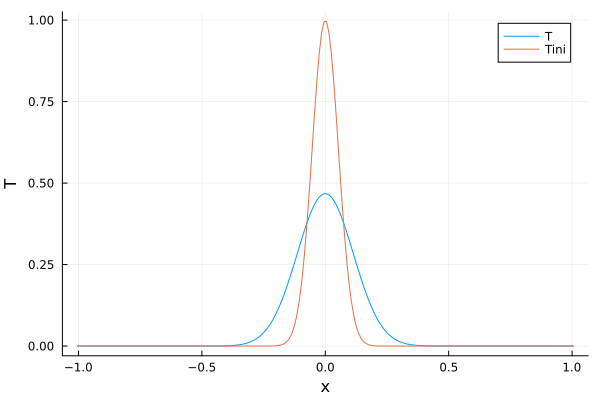

In [ ]:
# Physical parameters
xmax =-1.0
xmin = 1.0
k    = 1.0
ρ    = 1.0
cp   = 1.0
σ    = 0.075

# Numerical parameters
ncx  = 200
nt   = 100
Δx   = (xmax-xmin)/ncx
Δt   = Δx^2/(k/ρ/cp)/2

# Initial model configuration
xce  = LinRange(xmin-Δx/2, xmax+Δx/2, ncx+2)
T    = zeros(ncx+2)
T    .= exp.(-xce.^2/σ^2)
Tini = copy(T)
ΔT   = zeros(ncx) # size reduced by 2 because of second derivative

for it=1:nt

    # Impose zeros flux at the E/W sides
    T[1]   = T[2]
    T[end] = T[end-1]

    # comment in lecture gradient δTδx
    gradT = diff(T) / Δx
    # Compute Laplacian δ2Tδx2 =diff(diff(T))
    ΔT    .= diff(diff(T))/Δx^2

    # Update T
    # T[2:end-1] .= T[2:end-1] 

end

p1 = plot(xce, [T Tini], label=["T" "Tini"], xlabel="x", ylabel="T")
display(p1)

The diffusion of heat should respect both energy conservation and entropy production.

Let's solve for the evolution of energy and entropy using the balance laws:

$$
\rho \frac{\mathrm{d} u}{\mathrm{d} t} +  \frac{\partial q_u}{\partial x}  =  0
$$

$$
\rho \frac{\mathrm{d} s}{\mathrm{d} t} +  \frac{\partial q_s}{\partial x}  =  Qs
$$

The energy flux is $q_u = - k \frac{\partial T}{\partial x}$ and the entropy flux is: $q_s =\frac{q_u }{T}$

The entropy production takes the form of:
$$
Q_s = \frac{k}{T^2} \left(\frac{\partial T}{\partial x}\right)^2
$$

1) Compute the energy flux
2) Compute the entropy flux. Achtung: array sizes! The flux is defined on the vertices of the grid, therefore use interpolated (averaged) values of temperature (, e.g.: `ain .= 0.5*(a[1:end-1] .+ a[2:end])`).
3) Compute the temperature gradient 
4) Compute production of entropy Achtung: array sizes! The entropy production rate is on the inner centroids, so use use the values of `T` from the inner vertices (e.g., `a[2:end-1]`)
5) Update energy equation
6) Update entropy equation

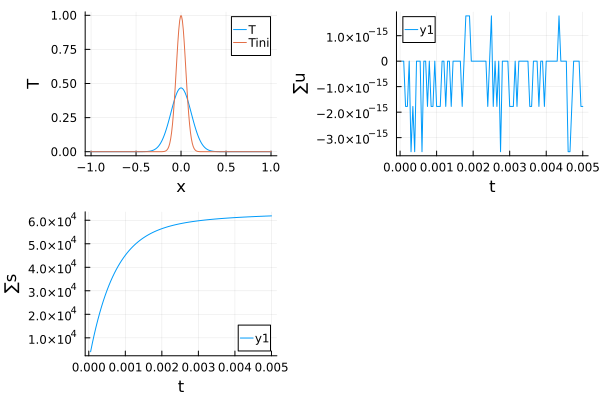

In [45]:
# Physical parameters
xmax =-1.0
xmin = 1.0
k    = 1.0
ρ    = 1.0
cp   = 1.0
σ    = 0.075

# Numerical parameters
ncx  = 200
nt   = 100
Δx   = (xmax-xmin)/ncx
Δt   = Δx^2/(k/ρ/cp)/2

# Initial model configuration
xce  = LinRange(xmin-Δx/2, xmax+Δx/2, ncx+2)
T    = zeros(ncx+2)
# T    = ...
Tini = copy(T)
ΔT   = zeros(ncx)
u    = ρ*cp*T
s    = zeros(ncx+2)
qu   = zeros(ncx+1)
qs   = zeros(ncx+1)
Qs   = zeros(ncx)
∂T∂x = zeros(ncx+1)
u_check = zeros(nt)
s_check = zeros(nt)

for it=1:nt

    # Impose zeros flux at the E/W sides
    T[1]   = T[2]
    T[end] = T[end-1]

    # Compute Laplacian
    # ΔT    .= ...

    # Flux and production terms
    # qu    .= ...
    # qs    .= ...
    # ∂T∂x  .= ...
    # Qs    .= ...

    # Update T
    # T[2:end-1] .= ...
    # u[2:end-1] .= ...
    # s[2:end-1] .= ...

    # Save the sum of energy and the sum of entropy 
    u_check[it] = sum(u)
    s_check[it] = sum(s)

end

p1 = plot(xce, [T Tini], label=["T" "Tini"], xlabel="x", ylabel="T")
p2 = plot((1:nt).*Δt, u_check .- u_check[1], xlabel="t", ylabel="∑u")
p3 = plot((1:nt).*Δt, s_check, xlabel="t", ylabel="∑s")
display(plot(p1, p2, p3))